# Example 4
In this example, we detect core-periphery structure in the airport networks 

# Packages

In [1]:
%load_ext autoreload
%autoreload 2
import sys

import cpnet
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

# import utils
from scipy import sparse

# Data

The worldwide airport network constructed from the openflight data.

Data source: 
- http://opsahl.co.uk/tnet/datasets/openflights.txt
- http://opsahl.co.uk/tnet/datasets/openflights_airports.txt
- https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv

Code to generate this network
- https://github.com/skojaku/core-periphery-detection/blob/add-notebook/scripts/generate-airport-net.py

In [2]:
# Node attributes
node_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/core-periphery-detection/add-notebook/data/node-table-airport.csv?token=AEJQ7B3DPCQGR4NXTZAFF3K7OZGTQ"
)

# Edge table
edge_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/core-periphery-detection/add-notebook/data/edge-table-airport.csv?token=AEJQ7B6PFAXLB6DEH4UDLXS7OZGYA"
)

In [3]:
G = nx.from_pandas_edgelist(edge_table)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2905
Number of edges: 15645
Average degree:  10.7711


# Detect core-periphery structure

In [4]:
# Detect core-periphery structure
kmconfig = cpnet.KM_config()  # Call the BE algorithm
kmconfig.detect(G)  # Detect core-periphery structures
c = kmconfig.get_pair_id()  # Get the group membership of nodes
x = kmconfig.get_coreness()  # Get the coreness of nodes

# Statistical test

In [5]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.05, num_of_rand_net=100, num_of_thread=16
)

100%|██████████| 100/100 [00:15<00:00,  6.31it/s]


# Visualization

In [19]:
pos = nx.spring_layout(
    G, scale = 2
)  # The position can be calculated and passed to the drawing function

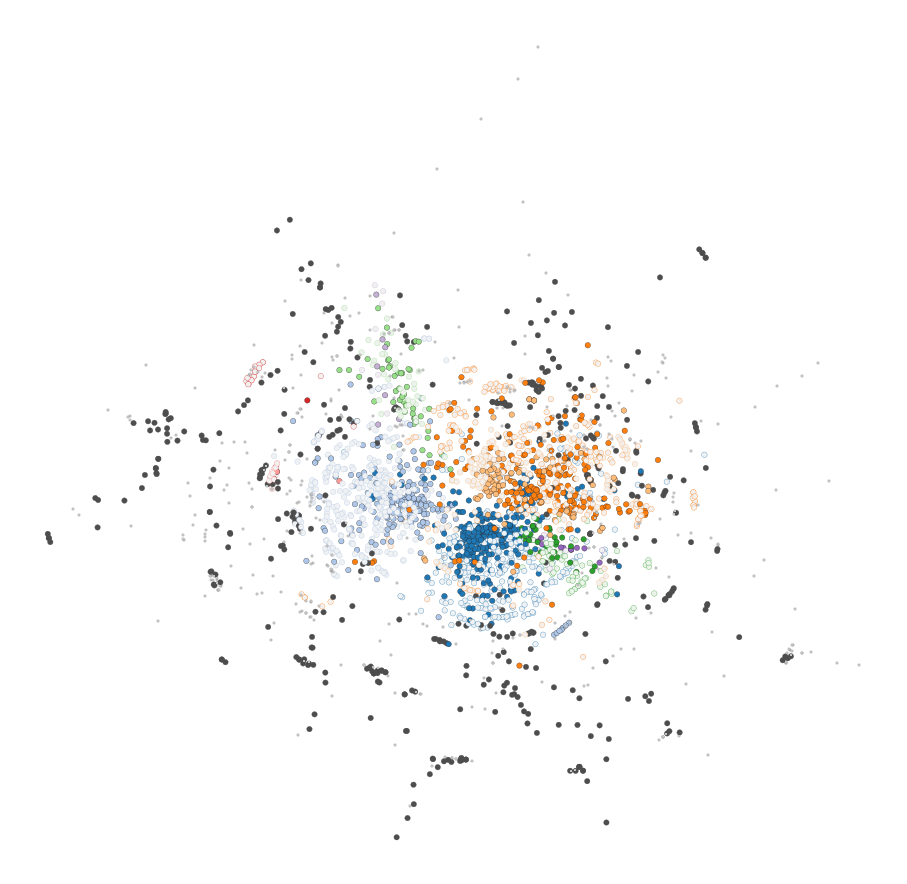

In [20]:
fig = plt.figure(figsize=(16, 16))
ax = plt.gca()

draw_nodes_kwd = {"node_size": 30, "linewidths": 0.3}
ax, pos = cpnet.draw(
    G,
    sig_c,
    sig_x,
    ax,
    pos=pos,
    draw_nodes_kwd=draw_nodes_kwd,
    max_colored_group_num=10,
    draw_edge=False,
)